<center>
<img src="../../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Современный анализ данных, глубокое обучение и приложения"
<img src="../../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: программист-исследователь Mail.ru Group  Юрий Кашницкий

Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала.
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание 2. <br> Анализ данных по перелетам между городами США в 2008 году с помощью Pandas и Seaborn</center>
**Заполните код в клетках и выберите ответы в [веб-форме](https://goo.gl/forms/0YDg8ctYJfyxuIhu2).**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

Скачайте и распакуте следующий [архив](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (~ 114 Mb, при разархивации - ~ 690 Mb). Описание полей таблицы дано [здесь](http://www.transtats.bts.gov/Fields.asp?Table_ID=236).
Данные  содержат перелеты между аэропортами США в 2008 году.

**Считаем данные в память в объект Pandas.DataFrame (это может занять пару минут).**

In [2]:
flights_df = pd.read_csv('../../../data/flights_2008.csv.bz2')

In [3]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 29)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


In [4]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
CRSDepTime,1955,735,620,930,1755
ArrTime,2211,1002,804,1054,1959
CRSArrTime,2225,1000,750,1100,1925
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920


In [5]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 1.5+ GB


In [6]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,1333.830046,478.068895,1.0,928.0,1325.0,1728.0,2400.0
CRSDepTime,7009728.0,1326.085663,464.250911,0.0,925.0,1320.0,1715.0,2359.0
ArrTime,6858079.0,1481.258227,505.225129,1.0,1107.0,1512.0,1909.0,2400.0
CRSArrTime,7009728.0,1494.801154,482.672822,0.0,1115.0,1517.0,1907.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ActualElapsedTime,6855029.0,127.322424,70.187308,12.0,77.0,110.0,157.0,1379.0


**Число уникальных рейсов:**

In [7]:
flights_df['FlightNum'].nunique()

7539

**Мы можем выполнять группировки для расчета различных агрегированных статистик.**

**Найдем топ-3 рейсов, совершивших самые длинные перелеты за 2008 год.**

In [8]:
flights_df.groupby('FlightNum')['Distance'].sum().sort_values(ascending=False).iloc[:3]

FlightNum
1     7793942
15    7639878
2     6888300
Name: Distance, dtype: int64

**Или так:**

In [9]:
flights_df.groupby('FlightNum')\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': {'_total': np.sum}})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

/home/v.shaydurov/anaconda3/lib/python3.6/site-packages/pandas/core/groupby.py:4036: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Distance                Cancelled
                  mean      sum count    _total
FlightNum                                      
1          1925.380929  7793942  4048        42
15         1823.795178  7639878  4189        51
2          1873.347838  6888300  3677        53

**Построение сводной таблицы:**

In [10]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**Бывает удобно "раскрашивать" такие сводные таблицы:**

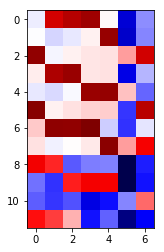

In [11]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic',interpolation='none');

**Гистограмма длин перелетов.**

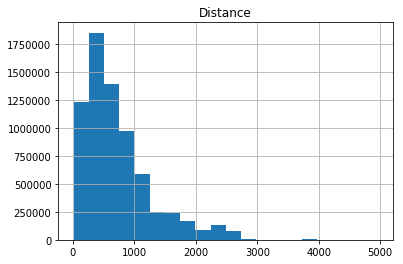

In [12]:
flights_df.hist('Distance', bins=20);

**Гистограмма частот перелетов в зависимости от даты.**

In [13]:
flights_df['Date'] = pd.to_datetime(flights_df.Year*10000 + 
                                    flights_df.Month*100 + 
                                    flights_df.DayofMonth, 
                            format='%Y%m%d')

In [14]:
num_flights_by_date = flights_df.groupby('Date')['FlightNum'].agg('count')

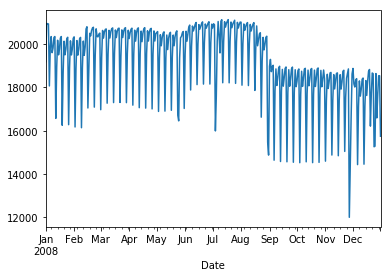

In [15]:
num_flights_by_date.plot();

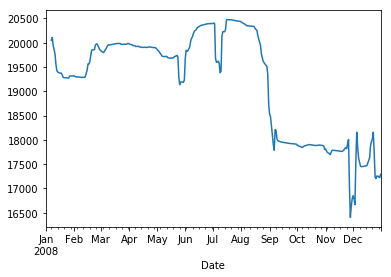

In [16]:
num_flights_by_date.rolling(window=7).mean().plot();

**1. Найдите топ-10 массовых перевозчиков (UniqueCarrier).**

**Кто из перечисленных не входит в этот топ-10? (указаны коды перевозчиков)**
- DL
- AA
- OO
- EV **[+]**

In [17]:
flights_df['UniqueCarrier'].value_counts().head(10)

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
Name: UniqueCarrier, dtype: int64

**2. Постройте распределение причин отмены рейсов (CancellationCode). **

**По какой причине рейсы отменяются чаще всего?**
- из-за перевозчика
- по погодным условиям **[+]**
- из-за National Air System
- по причинам безопасности

In [18]:
flights_df['CancellationCode'].value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

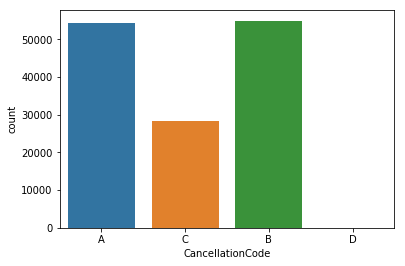

In [19]:
sns.countplot(flights_df['CancellationCode']);

В описании данных по ссылке в самом начале тетрадки (конкретно, [тут](https://www.transtats.bts.gov/FieldInfo.asp?Field_Desc=Specifies%20The%20Reason%20For%20Cancellation&Field_Type=Char&Lookup_Table=L_CANCELLATION&Table_ID=236&SYS_Table_Name=T_ONTIME&Sys_Field_Name=CANCELLATION_CODE)) видим, как расшифровываются коды. 

**3. Какой маршрут самый популярный, т.е. по которому больше всего прелетов (надо поработать с 'Origin' и 'Dest'])? Считайте A-B и B-A разными маршрутами.**
 - Нью-Йорк – Вашингтон
 - Сан-Франциско – Лос-Анжелес **[+]**
 - Сан-Хосе – Даллас
 - Нью-Йорк – Сан-Франциско

In [20]:
flights_df['Route'] = flights_df['Origin'] + '->' + flights_df['Dest']
flights_df['Route'].value_counts().head()

SFO->LAX    13788
LAX->SFO    13390
OGG->HNL    12383
LGA->BOS    12035
BOS->LGA    12029
Name: Route, dtype: int64

**4. Найдите топ-5 рейсов (по числу полетов) по каждому из типов задержек рейсов. Каким перевозчикам они принадлежат?**

**Выберите все рейсы, которые входят в топ-5 (по числу полетов) с задержками, связанными с погодными условиями.**

- 449 **[+]**
- 539 **[+]**
- 549 **[+]**
- 648 **[+]**

In [21]:
for delay_type in ['CarrierDelay', 'WeatherDelay','NASDelay',
               'SecurityDelay', 'LateAircraftDelay']:
    print(delay_type)
    sub_df = flights_df[flights_df[delay_type] > 0]
    top_races = sub_df['FlightNum'].value_counts().iloc[0:5,].index
    print("Top races are: {0}".format(list(top_races)))
    for race in top_races:
        print("Race {0} carriers: {1}".format(race, sub_df[sub_df['FlightNum'] == race]['UniqueCarrier'].unique()))

CarrierDelay
Top races are: [12, 15, 16, 44, 50]
Race 12 carriers: ['WN' 'XE' 'UA' 'US' 'DL' 'HA' 'AS' 'B6' 'CO' 'FL']
Race 15 carriers: ['WN' 'XE' 'UA' 'DL' 'HA' 'AA' 'AS' 'B6' 'CO' 'FL' 'US']
Race 16 carriers: ['WN' 'XE' 'UA' 'US' 'DL' 'HA' 'AA' 'AS' 'B6' 'CO' 'FL']
Race 44 carriers: ['WN' 'UA' 'US' 'DL' 'HA' 'AS' 'B6' 'FL' 'CO']
Race 50 carriers: ['WN' 'XE' 'UA' 'US' 'DL' 'B6' 'CO' 'FL']
WeatherDelay
Top races are: [539, 449, 648, 549, 653]
Race 539 carriers: ['WN' 'CO' 'F9' 'AA' 'UA' 'DL' 'FL' 'NW']
Race 449 carriers: ['F9' 'CO' 'FL' 'WN' 'UA' 'NW' 'AA']
Race 648 carriers: ['NW' 'CO' 'WN' 'FL' 'UA' 'DL' 'AA' 'US' 'AS']
Race 549 carriers: ['UA' 'DL' 'AA' 'CO' 'NW' 'FL' 'WN' 'HA']
Race 653 carriers: ['NW' 'UA' 'F9' 'AS' 'FL' 'AA']
NASDelay
Top races are: [75, 321, 701, 378, 15]
Race 75 carriers: ['WN' 'UA' 'US' 'DL' 'FL' 'AA' 'AS' 'B6']
Race 321 carriers: ['WN' 'UA' 'US' 'FL' 'NW' 'AA' 'AS' 'CO' 'XE' 'DL' 'B6']
Race 701 carriers: ['WN' 'UA' 'US' 'DL' 'FL' 'NW' 'AA' 'B6' 'CO']
Race 37

**5. Определите, как распределено количество рейсов в зависимости от времени дня.**

**Выберите все верные утверждения.**
 - Распределение полетов по часам (0-23) распределено нормально
 - Распределение полетов по часам (0-23) распределено равномерно
 - В период с 0 am до 4 am полетов на порядок меньше, чем в 7 pm **[+]**
 - В 5 утра перелетов больше, чем в 10 вечера **[+]**

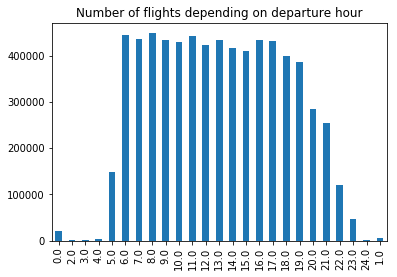

In [22]:
flights_df['DepHour'] = (flights_df['DepTime'] / 100).apply(np.floor) 
flights_df['DepHour'].value_counts(sort=False).plot(kind='bar',
        title="Number of flights depending on departure hour");

Отдельно проверим 3-е утверждение.

In [23]:
round((flights_df['DepHour'] == 19).sum() / (flights_df['DepHour'] < 5).sum())

12.0

**6. Опишите, как число полетов меняется во времени (по дням/неделям/месяцам), и проинтерпретируйте. Выберите все верные утверждения.**
- По выходным перелетов меньше, чем по будням **[+]**
- На неделе меньше всего летают в воскресенье
- Зимой перелетов меньше, чем летом **[+]**
- 30-го и 31-го числа меньше перелетов, чем в другие дни месяца, потому что в конце месяца люди меньше летают

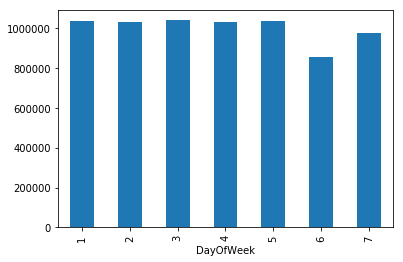

In [24]:
num_flights_by_day_of_week = flights_df.groupby('DayOfWeek')['FlightNum'].agg('count')
num_flights_by_day_of_week.plot(kind='bar');

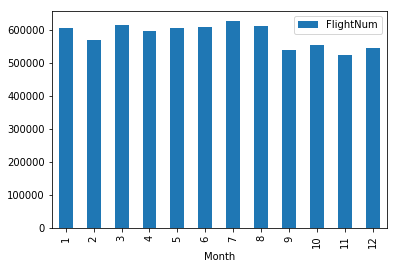

In [26]:
num_flights_by_month = flights_df.groupby('Month').agg({'FlightNum':np.size})
num_flights_by_month.plot(kind='bar');

Теперь посчитаем кол-во перелетов в зависимости от дня в месяце:

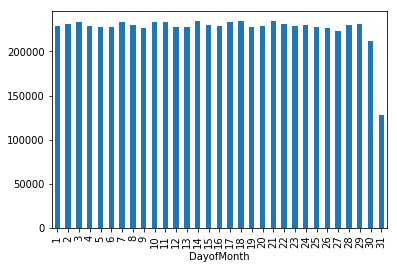

In [49]:
flights_df.groupby('DayofMonth')['FlightNum'].count().plot(kind='bar')

Видим, что с 1-го по 29-е число кол-во перелетов меняется слабо без какого-то тренда. Но 30-го и 31-го перелетов существенно меньше. Это может быть связано с тем, что в эти дни в среднем меньше перелетов, чем в другие. А может быть связано с тем, что этих дней в году меньше, чем других.

Чтобу понять, в чем причина, давайте посчитаем среднее кол-во перелетов в день в зависимости от дня месяца.

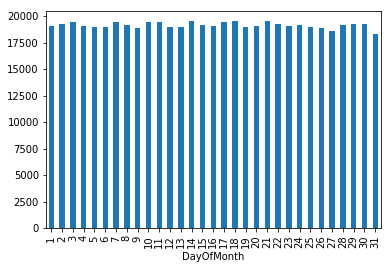

In [50]:
# Создадим новое поле date в формате YYYYMMDD
flights_df['date'] = flights_df['Year'] * 10000 + flights_df['Month']*100+flights_df['DayofMonth']

# Посчитаем общее кол-во перелетов за каждую дату
flights_by_day = flights_df.groupby('date')['FlightNum'].count().to_frame('cnt').reset_index()

# Теперь создадим новое поле -- день месяца
flights_by_day['DayOfMonth'] = flights_by_day['date'] % 100

# Нарисуем график среднего кол-ва перелетов в день в зависимости от дня месяца
flights_by_day.groupby('DayOfMonth')['cnt'].mean().plot(kind='bar')

Видим, что в среднем кол-во перелетов в день примерно одинаково в течение всего месяца. Гипотеза о том, что в конце месяца люди летают реже, не подтвердилась.